In [1]:
import pandas as pd
import numpy as np

In [91]:
a  =pd.DataFrame([[1, 'a'],[2, 'c'],[3, 'b'],[4, 'd']], columns  =['X1', 'X2'])

In [92]:
a['Y'] = a['X1'] ** 2 
print(a)

   X1 X2   Y
0   1  a   1
1   2  c   4
2   3  b   9
3   4  d  16


In [93]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      4 non-null      int64 
 1   X2      4 non-null      object
 2   Y       4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [94]:
a.at[2, 'Y'] = np.nan
a.at[3, 'X2'] = np.nan

In [95]:
a

,X1,X2,Y
0,1,a,1.0
1,2,c,4.0
2,3,b,NaN
3,4,NaN,16.0


In [126]:
b = a.sort_values('X2')

In [101]:
b.fillna(method="pad")

,X1,X2,Y
0,1,a,1.0
2,3,b,1.0
1,2,c,4.0
3,4,c,16.0


In [104]:
b['Y'].interpolate()

0     1.0
2     2.5
1     4.0
3    16.0
Name: Y, dtype: float64

In [106]:
print(b)
b.interpolate()

   X1   X2     Y
0   1    a   1.0
2   3    b   NaN
1   2    c   4.0
3   4  NaN  16.0


,X1,X2,Y
0,1,a,1.0
2,3,b,2.5
1,2,c,4.0
3,4,NaN,16.0


In [112]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
c = imp.fit_transform(b[['Y']]) ## noter ici les doubles crochets
print(c)
b['Y'] = c

[[ 1.]
 [ 4.]
 [ 4.]
 [16.]]


In [119]:
b

,X1,X2,Y
0,1,a,1.0
2,3,b,4.0
1,2,c,4.0
3,4,NaN,16.0


In [125]:
b.at[2,'Y']  = np.nan


In [127]:
b

,X1,X2,Y
0,1,a,1.0
2,3,b,NaN
1,2,c,4.0
3,4,NaN,16.0


In [122]:
from sklearn.experimental import enable_iterative_imputer  # noqa
>>> # now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [128]:
print(b)
imp = IterativeImputer(random_state=0)
c = imp.fit_transform(b[['Y']]) ## noter ici les doubles crochets
print(c)

   X1   X2     Y
0   1    a   1.0
2   3    b   NaN
1   2    c   4.0
3   4  NaN  16.0
[[ 1.]
 [ 7.]
 [ 4.]
 [16.]]


In [116]:
b.fillna(method="ffill")

,X1,X2,Y
0,1,a,1.0
2,3,b,4.0
1,2,c,4.0
3,4,c,16.0


In [157]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=20, n_features=1, noise=1, random_state=42)
print(X[:10])
print(y[:10])
dt = pd.DataFrame(zip(X.flat, y), columns = ['X', 'y'])
dt = dt.sort_values('X')
print(dt)

[[ 0.64768854]
 [ 0.49671415]
 [-0.23413696]
 [-1.72491783]
 [-0.90802408]
 [-1.4123037 ]
 [-0.46341769]
 [-1.01283112]
 [-0.23415337]
 [ 0.24196227]]
[ 32.09861817  22.02416663 -11.19371949 -78.89777532 -38.63393954
 -63.21729295 -22.15664218 -47.45730642 -10.55681343  10.50152413]
           X          y
15 -1.913280 -87.264497
3  -1.724918 -78.897775
5  -1.412304 -63.217293
7  -1.012831 -47.457306
4  -0.908024 -38.633940
13 -0.562288 -25.254898
10 -0.469474 -21.120284
18 -0.465730 -21.402292
6  -0.463418 -22.156642
8  -0.234153 -10.556813
2  -0.234137 -11.193719
17 -0.138264  -5.708099
9   0.241962  10.501524
19  0.314247  15.423870
1   0.496714  22.024167
16  0.542560  24.108975
0   0.647689  32.098618
12  0.767435  35.947834
14  1.523030  69.855053
11  1.579213  71.422903


In [144]:
import matplotlib.pyplot as plt

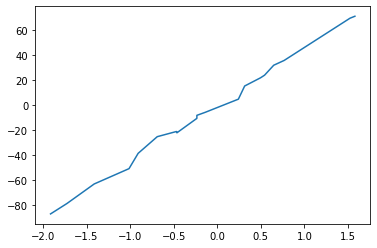

In [170]:
plt.plot(dt['X'],dt['y']  )

In [161]:
dt.iat[3, 1] = np.nan
dt.iat[10, 1] = np.nan
dt.iat[12, 1] = np.nan
dt.iat[5,0] = np.nan


In [169]:
dt = dt.interpolate()

In [117]:

b.interpolate(method ="pad", axis = 0)

,X1,X2,Y
0,1,a,1.0
2,3,b,4.0
1,2,c,4.0
3,4,c,16.0


In [118]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      4 non-null      int64  
 1   X2      3 non-null      object 
 2   Y       4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 128.0+ bytes
